<a href="https://colab.research.google.com/github/BhoomikaLohana/Customer-Segmentation-for-Strategic-Marketing/blob/main/Customer_Segmentation_for_Strategic_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation and Performance Marketing Project**

In the dynamic world of fast-moving consumer goods (FMCG), understanding customers at a deeper level is essential for businesses. By customizing marketing strategies to reach distinct customer segments, companies can boost sales, strengthen brand identity, and enhance overall business efficiency.

 This project will guide you through the steps of customer segmentation and the creation of targeted marketing strategies for specific customer clusters. Using data-driven approaches allows us to design impactful marketing campaigns that align with the unique preferences and needs of each segment.








# **Project Overview**

This Project will cover the following key steps:

* **Importing Libraries and Loading Data**
* **Exploratory Data Analysis (EDA) and Feature Engineering**
* **Using K-Means Clustering**
* **Customer Profiling Summary**
* **Summary of Findinngs and Conclusion**

---



**STEP 1. Importing Libariaries and Data**

---






In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#Set display to show all columns
pd.set_option('Display.max_columns',None)

In [3]:
#Loading Dataset
data=pd.read_csv("/content/marketing_campaign.csv")
data.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [4]:
data.shape

(2240, 1)

In [5]:
data.columns[0]

'ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'

In [6]:
data.iloc[:0]

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse


In [7]:
new_columns=data.columns[0].split("\t")
dataframe= data.iloc[:,0].str.split("\t", expand=True)
dataframe.columns=new_columns
dataframe.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
#Structure od dataset
dataframe.shape

(2240, 29)

In [9]:
#coulmns in dataframe
dataframe.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
#Checking data types
dataframe.dtypes

,0
ID,object
Year_Birth,object
Education,object
Marital_Status,object
Income,object
Kidhome,object
Teenhome,object
Dt_Customer,object
Recency,object
MntWines,object


In [11]:
# Checking Null values
dataframe.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [12]:
dataframe.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,59,5,8,1975,3,3,663,100,776,158,558,182,177,213,15,15,14,14,16,2,2,2,2,2,2,1,1,2
top,5524,1976,Graduation,Married,,0,0,31-08-2012,56,2,0,7,0,0,1,1,2,0,3,7,0,0,0,0,0,0,3,11,0
freq,1,89,1127,864,24,1293,1158,12,37,42,400,53,384,419,73,970,373,586,490,393,2077,2073,2077,2096,2210,2219,2240,2240,1906


# **Step 2: Feature Engineering**

In [13]:
#Creating new coulmn and changing data type
dataframe['children']=pd.to_numeric(dataframe['Kidhome'])+pd.to_numeric(dataframe['Teenhome'])
dataframe['children'].nunique()

4

In [14]:
# converting to correct data type
dataframe['Year_Birth']=pd.to_numeric(dataframe['Year_Birth'])

In [15]:
dataframe.dtypes

,0
ID,object
Year_Birth,int64
Education,object
Marital_Status,object
Income,object
Kidhome,object
Teenhome,object
Dt_Customer,object
Recency,object
MntWines,object


In [16]:
dataframe.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,children
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [17]:
#converting the datatype to numeric from index 4 to all
dataframe.iloc[:,4:]= dataframe.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

In [18]:
# Convert specific columns to numeric
numeric_columns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp4',
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

for col in numeric_columns:
    dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')

In [19]:
print(
    dataframe.shape,
    dataframe['ID'].nunique()
)

(2240, 30) 2240




---


**AGE GROUP:**


The majority of the company's customers, 85%, are above 40 years old, while there are no customers under the age of 18.


---



In [20]:
# Calculate age
current_year = pd.to_datetime('today').year
dataframe['Age'] = current_year - dataframe['Year_Birth']

# Define age bins
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create a new column with the age groups
dataframe['Age Group'] = pd.cut(dataframe['Age'], bins=bins, labels=labels, right=False)

# Count the number of customers in each age group
age_group_counts = dataframe['Age Group'].value_counts().sort_index()

# Select the relevant columns
df_Age_Group= dataframe[['Age Group', 'Recency', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']]

#  calculate the median
median_columns = ['Recency', 'Income', 'Kidhome', 'Teenhome']

# columns to aggregate (sum for these columns)
aggregate_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']
# Create the grouped DataFrame
df_Age = df_Age_Group.groupby('Age Group',observed=True).agg(
    {**{col: 'median' for col in median_columns},
     **{col: 'sum' for col in aggregate_columns}}
).reset_index()
df_Age

,Age Group,Recency,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,19-30,56.0,34824.0,0.0,0.0,1424,117,1631,270,293,209,9,18,25,41,35,2,0,1,0,0,1
1,31-40,47.0,38595.5,0.5,0.0,55480,6664,43807,8594,6648,9485,356,723,532,1178,1137,18,11,26,23,3,1
2,41-50,47.0,43586.0,1.0,0.0,135284,13892,82611,20417,14338,22874,1240,2083,1277,2958,3112,54,27,35,33,4,8
3,51-60,48.5,48877.0,0.5,1.0,192663,15971,101012,21434,16568,27110,1727,2786,1575,3772,3819,45,56,43,26,10,0
4,60+,52.0,58177.5,0.0,1.0,295187,22123,144332,33224,22706,38680,1873,3533,2547,5013,3796,44,73,57,62,13,10


In [21]:
#count the number of customers in each age group
age_group_counts = dataframe['Age Group'].value_counts().sort_index()
age_group_percentage=(age_group_counts/len(dataframe))*100
age_group_percentage=age_group_percentage.round(2).astype(str) + '%'
age_group_percentage = age_group_percentage.reset_index()
age_group_percentage.columns = ['Age Group', 'Percentage']
display(age_group_percentage)

,Age Group,Percentage
0,0-18,0.0%
1,19-30,0.31%
2,31-40,9.55%
3,41-50,24.87%
4,51-60,30.18%
5,60+,34.96%


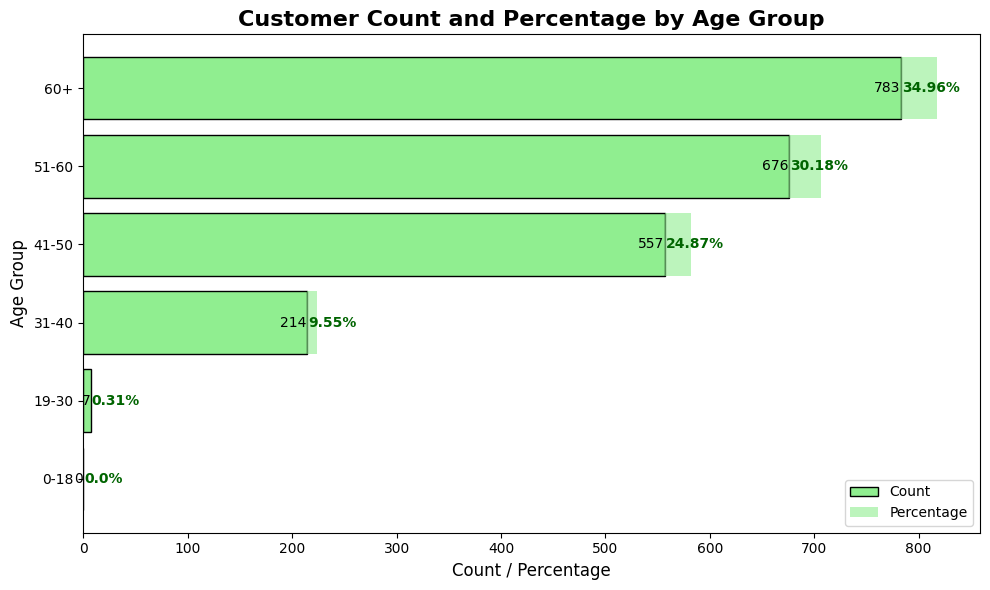

In [22]:
# Calculate the count and percentage of customers in each age group
age_group_counts = dataframe['Age Group'].value_counts().sort_index()
age_group_percentage = ((age_group_counts / len(dataframe)) * 100).round(2)

# Create a DataFrame for plotting
age_group_df = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage': age_group_percentage
})

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the count bars
bars_count = ax.barh(
    age_group_df.index.astype(str),
    age_group_df['Count'],
    color='lightgreen',
    edgecolor='black',
    label='Count'
)

# Plot the percentage bars
bars_percentage = ax.barh(
    age_group_df.index.astype(str),
    age_group_df['Percentage'],
    left=age_group_df['Count'],
    color='lightgreen',
    alpha=0.6,
    label='Percentage'
)

# Add labels for each bar
for bar, count, percentage in zip(bars_count, age_group_df['Count'], age_group_df['Percentage']):
    # Add count labels inside the bar
    ax.text(
        bar.get_width() - 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{count}",
        ha='right',
        va='center',
        fontsize=10,
        color='black'
    )
    # Add percentage labels outside the bar
    ax.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{percentage}%",
        ha='left',
        va='center',
        fontsize=10,
        color='darkgreen',
        fontweight='bold'
    )
ax.set_title('Customer Count and Percentage by Age Group', fontsize=16, fontweight='bold')
ax.set_xlabel('Count / Percentage', fontsize=12)
ax.set_ylabel('Age Group', fontsize=12)
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()




---


**Number of Children at Home**

71.52% customer have atleast one child at Home.


---



In [23]:
# Calculate the count of customers for Kidhome and Teenhome
kidhome_counts = dataframe['Kidhome'].value_counts()
teenhome_counts = dataframe['Teenhome'].value_counts()
childrenhome_counts = dataframe['children'].value_counts()

# Create DataFrames for Kidhome and Teenhome with percentages
kidhome_df = pd.DataFrame({'Count': kidhome_counts,'Percentage': (kidhome_counts / len(dataframe)) * 100}).reset_index()
kidhome_df.columns = ['Kidhome', 'Count', 'Percentage']
kidhome_df['Percentage'] = kidhome_df['Percentage'].round(2)

teenhome_df = pd.DataFrame({'Count': teenhome_counts,'Percentage': (teenhome_counts / len(dataframe)) * 100}).reset_index()
teenhome_df.columns = ['Teenhome', 'Count', 'Percentage']
teenhome_df['Percentage'] = teenhome_df['Percentage'].round(2)


childrenhome_df = pd.DataFrame({'Count': childrenhome_counts,'Percentage': (childrenhome_counts / len(dataframe)) * 100}).reset_index()
childrenhome_df.columns = ['Childrenhome', 'Count', 'Percentage']
childrenhome_df['Percentage'] = childrenhome_df['Percentage'].round(2)

# Display the DataFrames
display(kidhome_df, kidhome_counts.sum(),teenhome_df,teenhome_counts.sum(),childrenhome_df,childrenhome_counts.sum())

,Kidhome,Count,Percentage
0,0,1293,57.72
1,1,899,40.13
2,2,48,2.14


2240

,Teenhome,Count,Percentage
0,0,1158,51.70
1,1,1030,45.98
2,2,52,2.32


2240

,Childrenhome,Count,Percentage
0,1,1128,50.36
1,0,638,28.48
2,2,421,18.79
3,3,53,2.37


2240

In [24]:
# Define possible values for Kidhome and Teenhome
kidhome_values = [0, 1, 2]
teenhome_values = [0, 1, 2]

children = []
total_customers = len(dataframe)

# Loop through all possible combinations of Kidhome and Teenhome
for i in kidhome_values:
    for j in teenhome_values:
        # Filter the DataFrame based on the current values of Kidhome and Teenhome
        d = dataframe[(dataframe['Kidhome'] == i) & (dataframe['Teenhome'] == j)]


        customer_count = d.shape[0]
        percentage = (customer_count / total_customers) * 100
        children.append({'Kidhome': i, 'Teenhome': j, 'Customer_Count': customer_count, 'Percentage': round(percentage, 2)})

# Convert the list into a DataFrame
children_df = pd.DataFrame(children).sort_values(by='Customer_Count', ascending=False)
print(children_df)

   Kidhome  Teenhome  Customer_Count  Percentage
0        0         0             638       28.48
1        0         1             625       27.90
3        1         0             503       22.46
4        1         1             374       16.70
7        2         1              31        1.38
2        0         2              30        1.34
5        1         2              22        0.98
6        2         0              17        0.76
8        2         2               0        0.00




---


**Education Level**

88.53% of the customer has a bachelor's or higher degree


---



In [25]:
# Initialize the dictionary with education levels
Education_Level = {edu: 0 for edu in dataframe['Education'].unique()}

# Count the number of customers for each education level
for edu in Education_Level.keys():
    Education_Level[edu] = dataframe[dataframe['Education'] == edu]['Education'].count()

# Convert the dictionary to a DataFrame
Education_Level_df = pd.DataFrame(Education_Level.items(), columns=['Education', 'Count'])

# Sort the DataFrame by count and reset the index
Education_Level_df.sort_values(by='Count', ascending=False, inplace=True)
Education_Level_df.reset_index(drop=True, inplace=True)
Education_Level_df['Percentage'] = Education_Level_df['Count'] / Education_Level_df['Count'].sum() * 100
Education_Level_df['Percentage']=Education_Level_df['Percentage'].round(2)
Education_Level_df

,Education,Count,Percentage
0,Graduation,1127,50.31
1,PhD,486,21.70
2,Master,370,16.52
3,2n Cycle,203,9.06
4,Basic,54,2.41


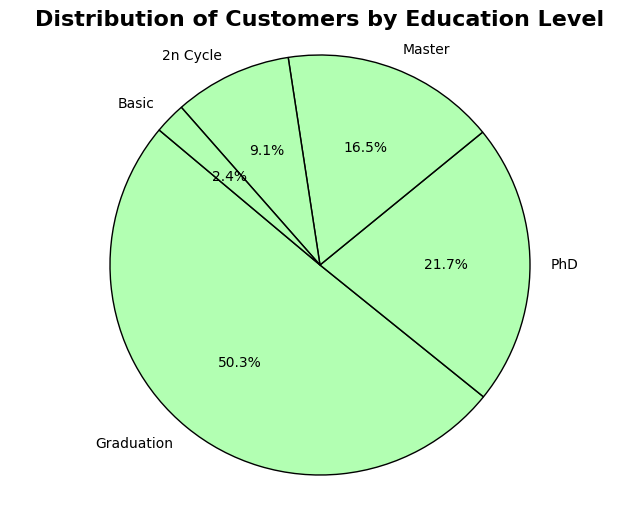

In [26]:
# Pie chart visualization for Education Level percentages
plt.figure(figsize=(8, 6))
light_green = (0.5, 1.0, 0.5, 0.6)
# Create the pie chart
plt.pie(
    Education_Level_df['Percentage'],
    labels=Education_Level_df['Education'],
    autopct='%1.1f%%',
    startangle=140,
    colors=[light_green] * len(Education_Level_df),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Customers by Education Level', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


**Income Level**

66.45% of the customer earns more than 40K annually

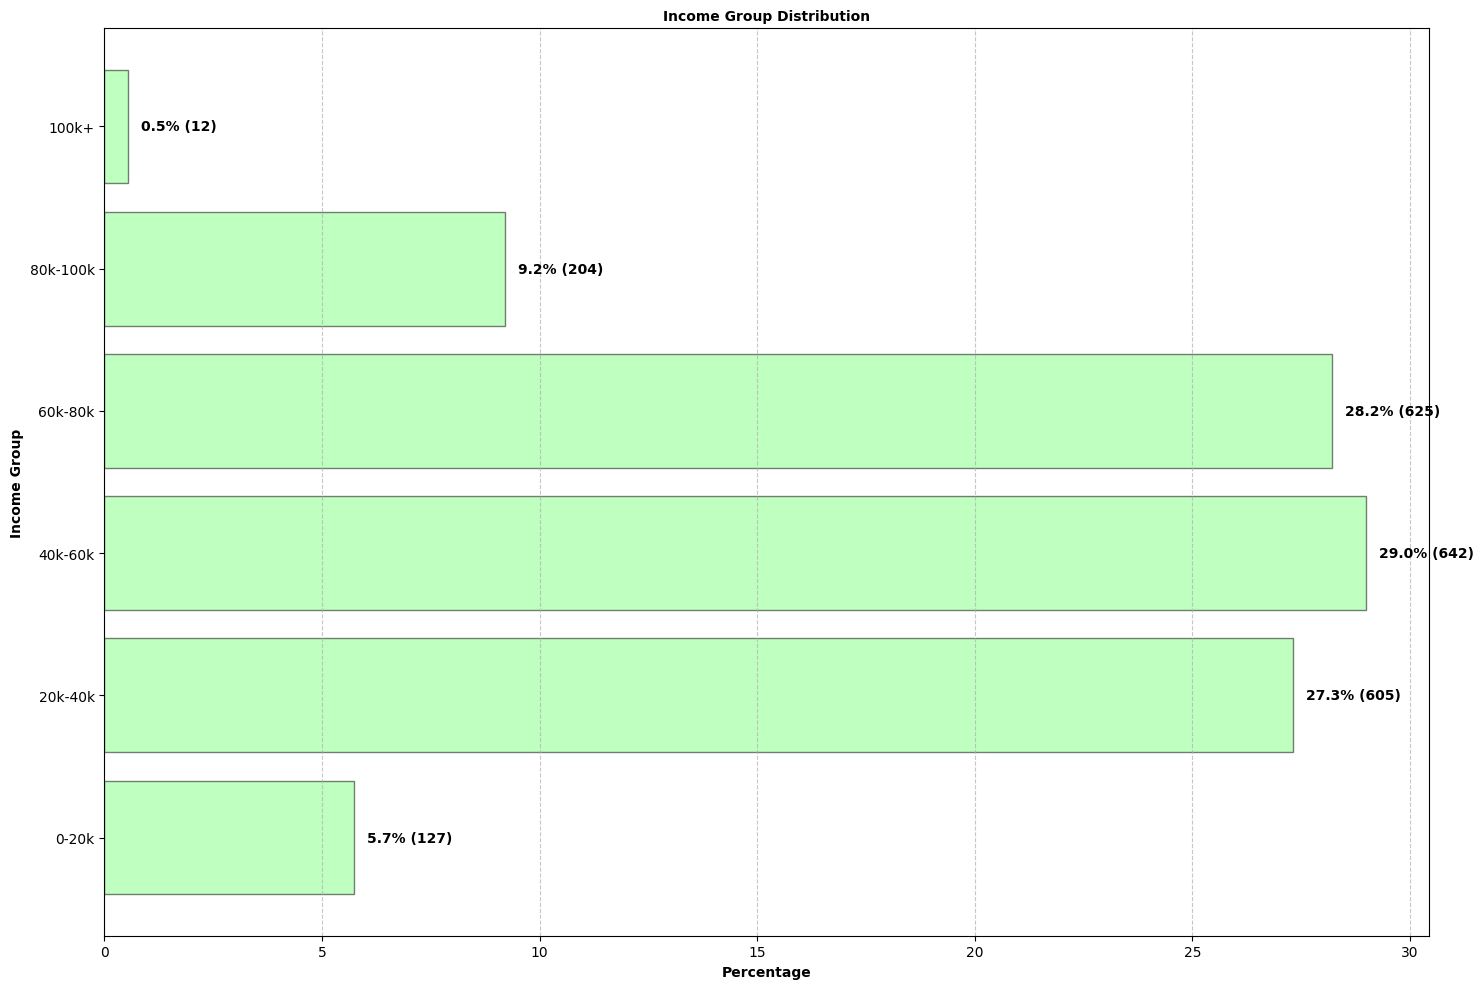

In [27]:
# Define income bins and labels
bins = [0, 20000, 40000, 60000, 80000, 100000, dataframe['Income'].max()]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']

# Create a new column for income groups
dataframe['Income Group'] = pd.cut(dataframe['Income'], bins=bins, labels=labels, right=False)

# Count the number of customers in each income group
income_group_counts = dataframe['Income Group'].value_counts().sort_index()

# Calculate percentages
income_group_percentages = (income_group_counts / income_group_counts.sum()) * 100

# Create a horizontal bar chart
plt.figure(figsize=(15, 10))
bars = plt.barh(
    income_group_counts.index,
    income_group_percentages,
    color=(0.5, 1.0, 0.5, 0.8),
    edgecolor='black',
    alpha=0.5
)

# Add labels for percentage and count on the bars
for bar, percentage, count in zip(bars, income_group_percentages, income_group_counts):
    plt.text(
        bar.get_width() + 0.3,
        bar.get_y() + bar.get_height() / 2,
        f'{percentage:.1f}% ({count})',
        va='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Customize the chart
plt.title('Income Group Distribution', fontsize=10, fontweight='bold')
plt.xlabel('Percentage', fontsize=10, fontweight='bold')
plt.ylabel('Income Group', fontsize=10, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Marital Status**

64.46% Customers have a partner

In [28]:
# Initialize the dictionary with marital statuses
Marital_Status_Level = {status: 0 for status in dataframe['Marital_Status'].unique()}

# Count the number of customers for each marital status
for status in Marital_Status_Level.keys():
    Marital_Status_Level[status] = dataframe[dataframe['Marital_Status'] == status]['Marital_Status'].count()

# Convert the dictionary to a DataFrame
Marital_Status_Level_df = pd.DataFrame(Marital_Status_Level.items(), columns=['Marital Status', 'Count'])

# Sort the DataFrame by count and reset the index
Marital_Status_Level_df.sort_values(by='Count', ascending=False, inplace=True)
Marital_Status_Level_df.reset_index(drop=True, inplace=True)

Marital_Status_Level_df['Percentage'] = (Marital_Status_Level_df['Count'] / Marital_Status_Level_df['Count'].sum()) * 100
Marital_Status_Level_df['Percentage'] = Marital_Status_Level_df['Percentage'].round(2)
Marital_Status_Level_df

,Marital Status,Count,Percentage
0,Married,864,38.57
1,Together,580,25.89
2,Single,480,21.43
3,Divorced,232,10.36
4,Widow,77,3.44
5,Alone,3,0.13
6,Absurd,2,0.09
7,YOLO,2,0.09


**Spending Capability**

low spenders: 31.70% of Customer fall under the category of low spending Habits

Mid spenders: 41.4% of Customer fall under the category of medium spending Habits

High spenders: 26.88% of Customer fall under the category of High spending Habits

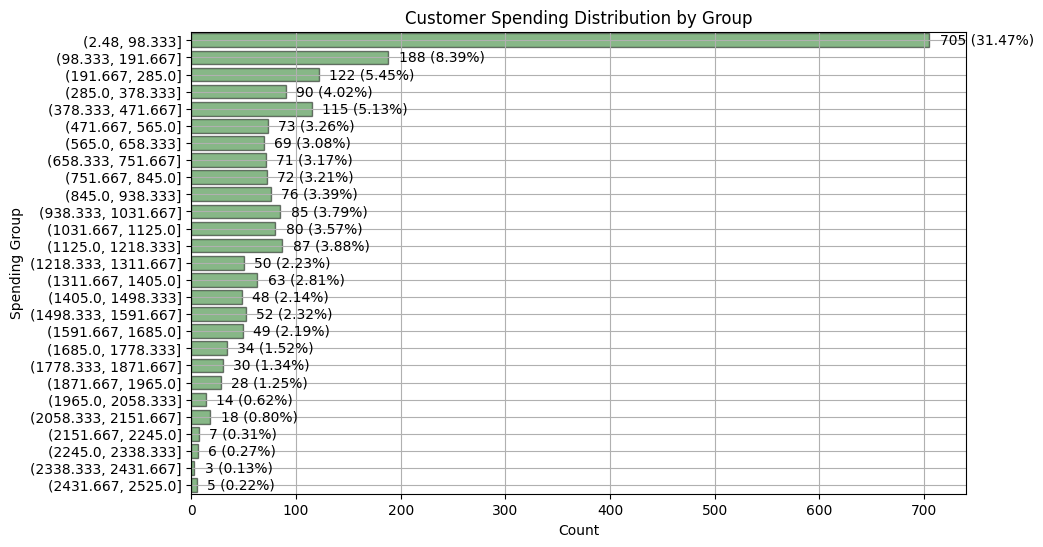

,Spending_Group,Count,Percentage
1,0-100 Low Spenders,710,31.70
0,101-1000 Mid Spenders,928,41.43
2,1000+ High Spenders,602,26.88


In [29]:
Product_Sales_Features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
dataframe['Customer_Spent'] = dataframe[Product_Sales_Features].sum(axis=1, skipna=True)
dataframe['Customer_Spent']=dataframe['Customer_Spent'].astype(int)
# Create a custom number of bins based on the distribution
num_bins = 27

# Create the groups for 'Customer_Spent' using bins
dataframe['Spending_Group'] = pd.cut(dataframe['Customer_Spent'], bins=num_bins)

# Calculate the count and percentage for each spending group
group_counts = dataframe['Spending_Group'].value_counts().sort_index()
group_percentages = (group_counts / group_counts.sum()) * 100

# Plot horizontal bar chart with both count and percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts, y=group_counts.index, color='green',alpha=0.5, edgecolor='black')

# Adding count and percentage labels
for index, value in enumerate(group_counts):
    percentage = group_percentages.iloc[index]
    plt.text(value + 10, index, f'{value} ({percentage:.2f}%)', va='center')

plt.title('Customer Spending Distribution by Group')
plt.xlabel('Count')
plt.ylabel('Spending Group')
plt.grid(True)
plt.show()

# Define the custom bin edges for the spending groups
bins = [0, 100, 1000, float('inf')]
labels = ['0-100 Low Spenders', '101-1000 Mid Spenders', '1000+ High Spenders']

# Create the 'Spending_Group' column based on the defined bins
dataframe['Spending_Group'] = pd.cut(dataframe['Customer_Spent'], bins=bins, labels=labels, right=False)

# Group by 'Spending_Group' to calculate count and percentage
spending_group_counts = dataframe['Spending_Group'].value_counts()
spending_group_percentage = (spending_group_counts / len(dataframe)) * 100
spending_group_percentage = spending_group_percentage.round(2)

# Create a DataFrame to store counts and percentages
spending_group_summary = pd.DataFrame({
    'Spending_Group': spending_group_counts.index,
    'Count': spending_group_counts,
    'Percentage': spending_group_percentage
})

spending_group_summary.reset_index(drop=True,inplace=True)
# Display the first few rows of the spending group summary
spending_group_summary.sort_values(by='Spending_Group',inplace=True)
spending_group_summary.head()

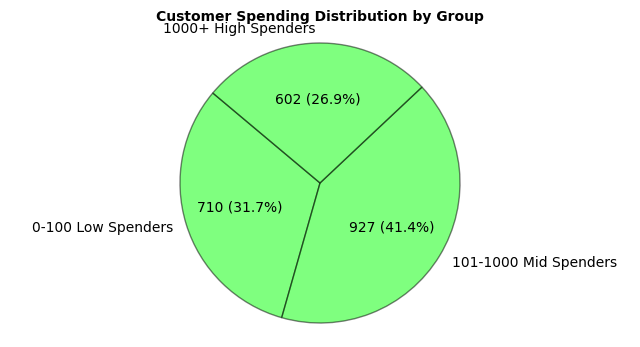

In [30]:
# Pie chart visualization for spending groups with counts and percentages in green with transparency
plt.figure(figsize=(8, 4))

# Define a function to format the labels with both percentage and count
def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals))
    return f"{absolute} ({pct:.1f}%)"

green_color = (0.0, 1.0, 0.0, 0.5)
# Plot the pie chart
plt.pie(
    spending_group_summary['Percentage'],
    labels=spending_group_summary['Spending_Group'],
    autopct=lambda pct: func(pct, spending_group_summary['Count']),
    startangle=140,
    colors=[green_color] * len(spending_group_summary),
    wedgeprops={'edgecolor': 'black', 'alpha': 0.5}
)
plt.title('Customer Spending Distribution by Group', fontsize=10, fontweight='bold')
plt.axis('equal')
plt.show()


In [31]:
dataframe.dtypes

,0
ID,object
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,object
Teenhome,object
Dt_Customer,object
Recency,int64
MntWines,int64


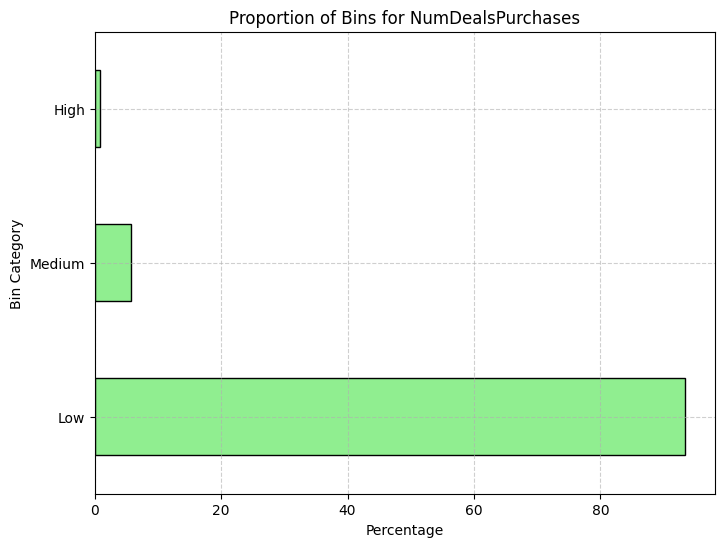

Proportions for NumDealsPurchases:
NumDealsPurchases_Bin
Low       93.437500
Medium     5.714286
High       0.848214
Name: proportion, dtype: float64




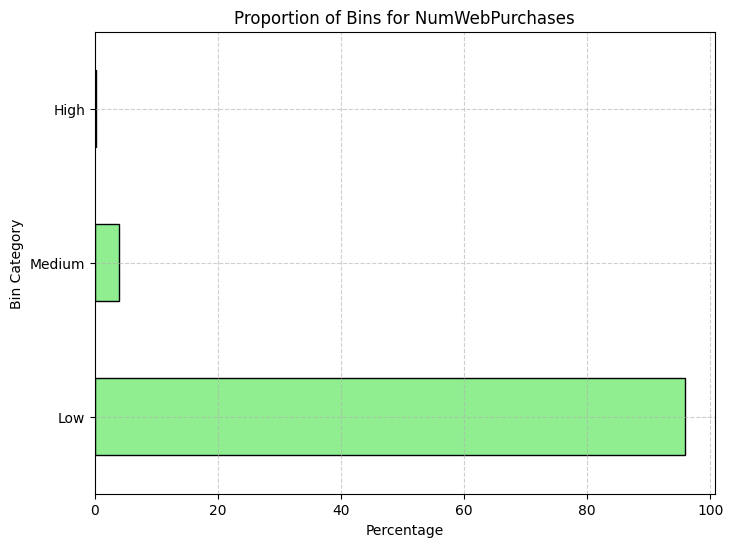

Proportions for NumWebPurchases:
NumWebPurchases_Bin
Low       95.937500
Medium     3.883929
High       0.178571
Name: proportion, dtype: float64




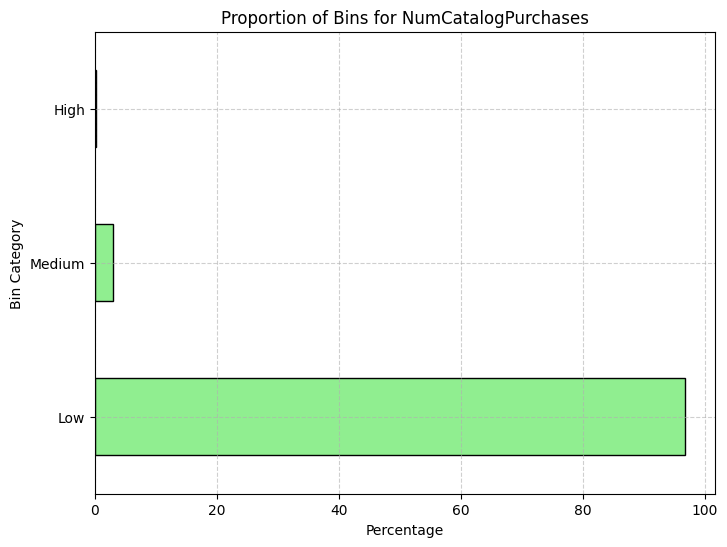

Proportions for NumCatalogPurchases:
NumCatalogPurchases_Bin
Low       96.830357
Medium     2.991071
High       0.178571
Name: proportion, dtype: float64




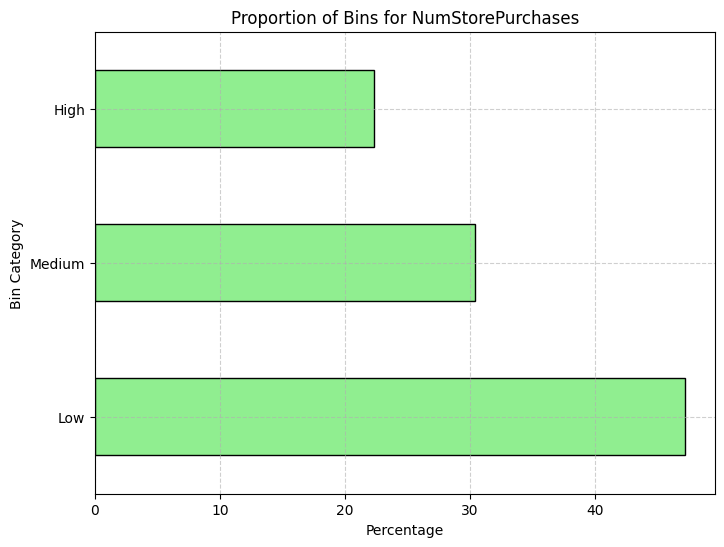

Proportions for NumStorePurchases:
NumStorePurchases_Bin
Low       47.232143
Medium    30.446429
High      22.321429
Name: proportion, dtype: float64




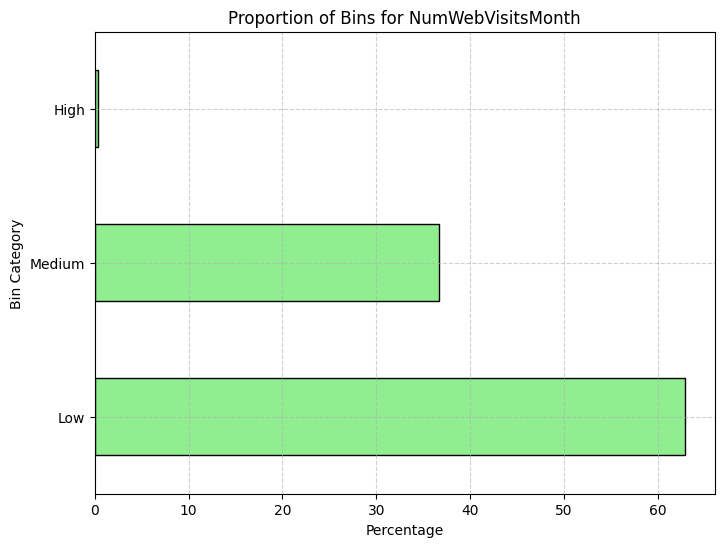

Proportions for NumWebVisitsMonth:
NumWebVisitsMonth_Bin
Low       62.946429
Medium    36.696429
High       0.357143
Name: proportion, dtype: float64




In [44]:
#Order Channel Preference Features
Order_Channel_Preference_Features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Plotting the distribution of each feature's bins
for i in Order_Channel_Preference_Features:
    # Create 3 bins for each feature
    bins = pd.cut(dataframe[i], bins=3, labels=["Low", "Medium", "High"], include_lowest=True)
    dataframe[f'{i}_Bin'] = bins

    # Calculate the proportions (percentages) for each bin
    bin_proportions = dataframe[f'{i}_Bin'].value_counts(normalize=True) * 100

    # Plotting the horizontal bar chart for the proportions of each bin
    plt.figure(figsize=(8, 6))
    bin_proportions.sort_index().plot(kind='barh', color='lightgreen', edgecolor='black')
    plt.title(f'Proportion of Bins for {i}')
    plt.xlabel('Percentage')
    plt.ylabel('Bin Category')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Display the proportions for each bin
    print(f"Proportions for {i}:")
    print(bin_proportions)
    print("\n")

In [33]:
# Order Channel Preference Features
Order_Channel_Preference_Features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Loop through each feature to create 3 bins
for i in Order_Channel_Preference_Features:
    # Display the feature name, min and max values
    print(f"Feature: {i}")
    print(f"Min: {dataframe[i].min()}, Max: {dataframe[i].max()}")

    # Create 3 bins for each feature
    bins = pd.cut(dataframe[i], bins=3, labels=["Low", "Medium", "High"], include_lowest=True)

    # Add the bin labels as a new column in df_split
    dataframe[f'{i}_Bin'] = bins

# Display the first few rows of df_split to check the results
display(dataframe.head())

Feature: NumDealsPurchases
Min: 0, Max: 15
Feature: NumWebPurchases
Min: 0, Max: 27
Feature: NumCatalogPurchases
Min: 0, Max: 28
Feature: NumStorePurchases
Min: 0, Max: 13
Feature: NumWebVisitsMonth
Min: 0, Max: 20


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,children,Age,Age Group,Income Group,Customer_Spent,Spending_Group,NumDealsPurchases_Bin,NumWebPurchases_Bin,NumCatalogPurchases_Bin,NumStorePurchases_Bin,NumWebVisitsMonth_Bin
0,5524,1957,Graduation,Single,58138.0,0,0,NaN,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,67,60+,40k-60k,1617,1000+ High Spenders,Low,Low,Medium,Low,Medium
1,2174,1954,Graduation,Single,46344.0,1,1,NaN,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,70,60+,40k-60k,27,0-100 Low Spenders,Low,Low,Low,Low,Low
2,4141,1965,Graduation,Together,71613.0,0,0,NaN,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,59,51-60,60k-80k,776,101-1000 Mid Spenders,Low,Low,Low,High,Low
3,6182,1984,Graduation,Together,26646.0,1,0,NaN,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,40,41-50,20k-40k,53,0-100 Low Spenders,Low,Low,Low,Low,Low
4,5324,1981,PhD,Married,58293.0,1,0,NaN,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,43,41-50,40k-60k,422,101-1000 Mid Spenders,Low,Low,Low,Medium,Low


# **Step 4. Using K-Means Clustring**

Silhouette Score for 3 clusters: 0.65


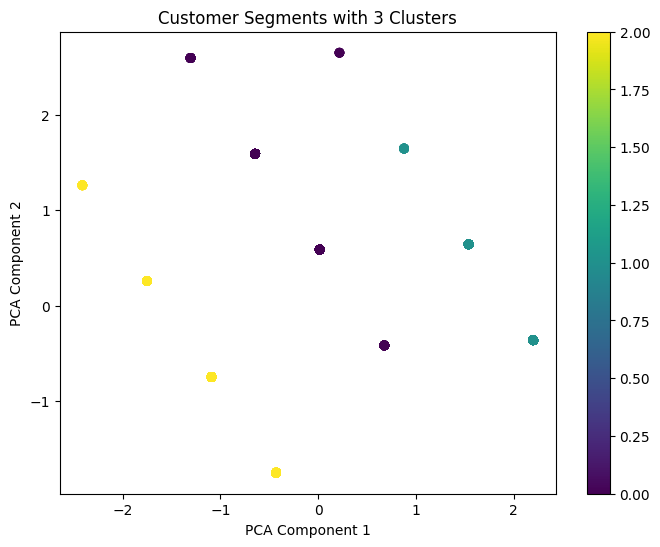

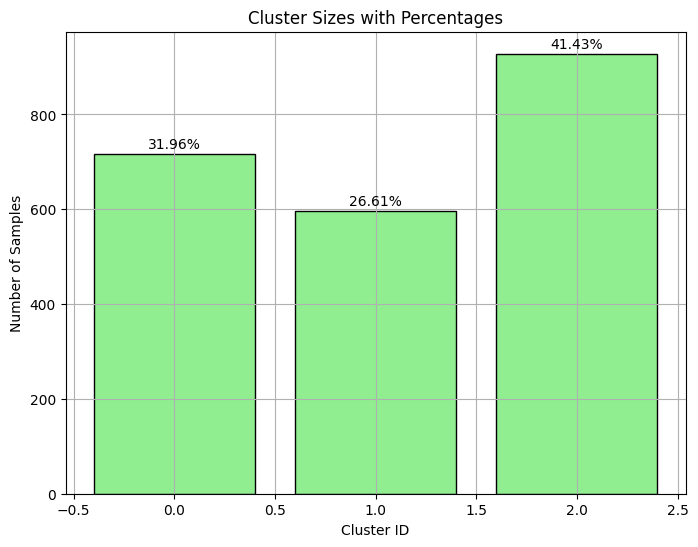

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Prepare Features
Customer_Information_Features = ['children']
Order_Channel_Preference_Features = ['NumDealsPurchases_Bin', 'NumWebPurchases_Bin', 'NumCatalogPurchases_Bin', 'NumStorePurchases_Bin']

# Selecting relevant features for clustering
features = Customer_Information_Features
X = dataframe[features]

X = X.apply(pd.to_numeric, errors='coerce')

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(dataframe[['Spending_Group']], drop_first=True)

# Combine the numerical and categorical features
X = pd.concat([X, df_encoded], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Manually set the number of clusters
n_clusters = 3

# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
dataframe['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, dataframe['Cluster'])
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")

# Check the distribution of samples in each cluster
cluster_counts = dataframe['Cluster'].value_counts()
cluster_percentages = (cluster_counts / len(dataframe)) * 100

# Visualize the clusters using PCA for dimensionality reduction (2D visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=dataframe['Cluster'], cmap='viridis')
plt.title(f'Customer Segments with {n_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Visualize the cluster sizes with percentage
cluster_sizes = cluster_counts.sort_values()
cluster_percentages_sorted = cluster_percentages[cluster_sizes.index]

plt.figure(figsize=(8, 6))
bars = plt.bar(cluster_sizes.index, cluster_sizes.values, color='lightgreen', edgecolor='black')

# Add percentage labels on the bars
for bar, percentage in zip(bars, cluster_percentages_sorted):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title("Cluster Sizes with Percentages")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

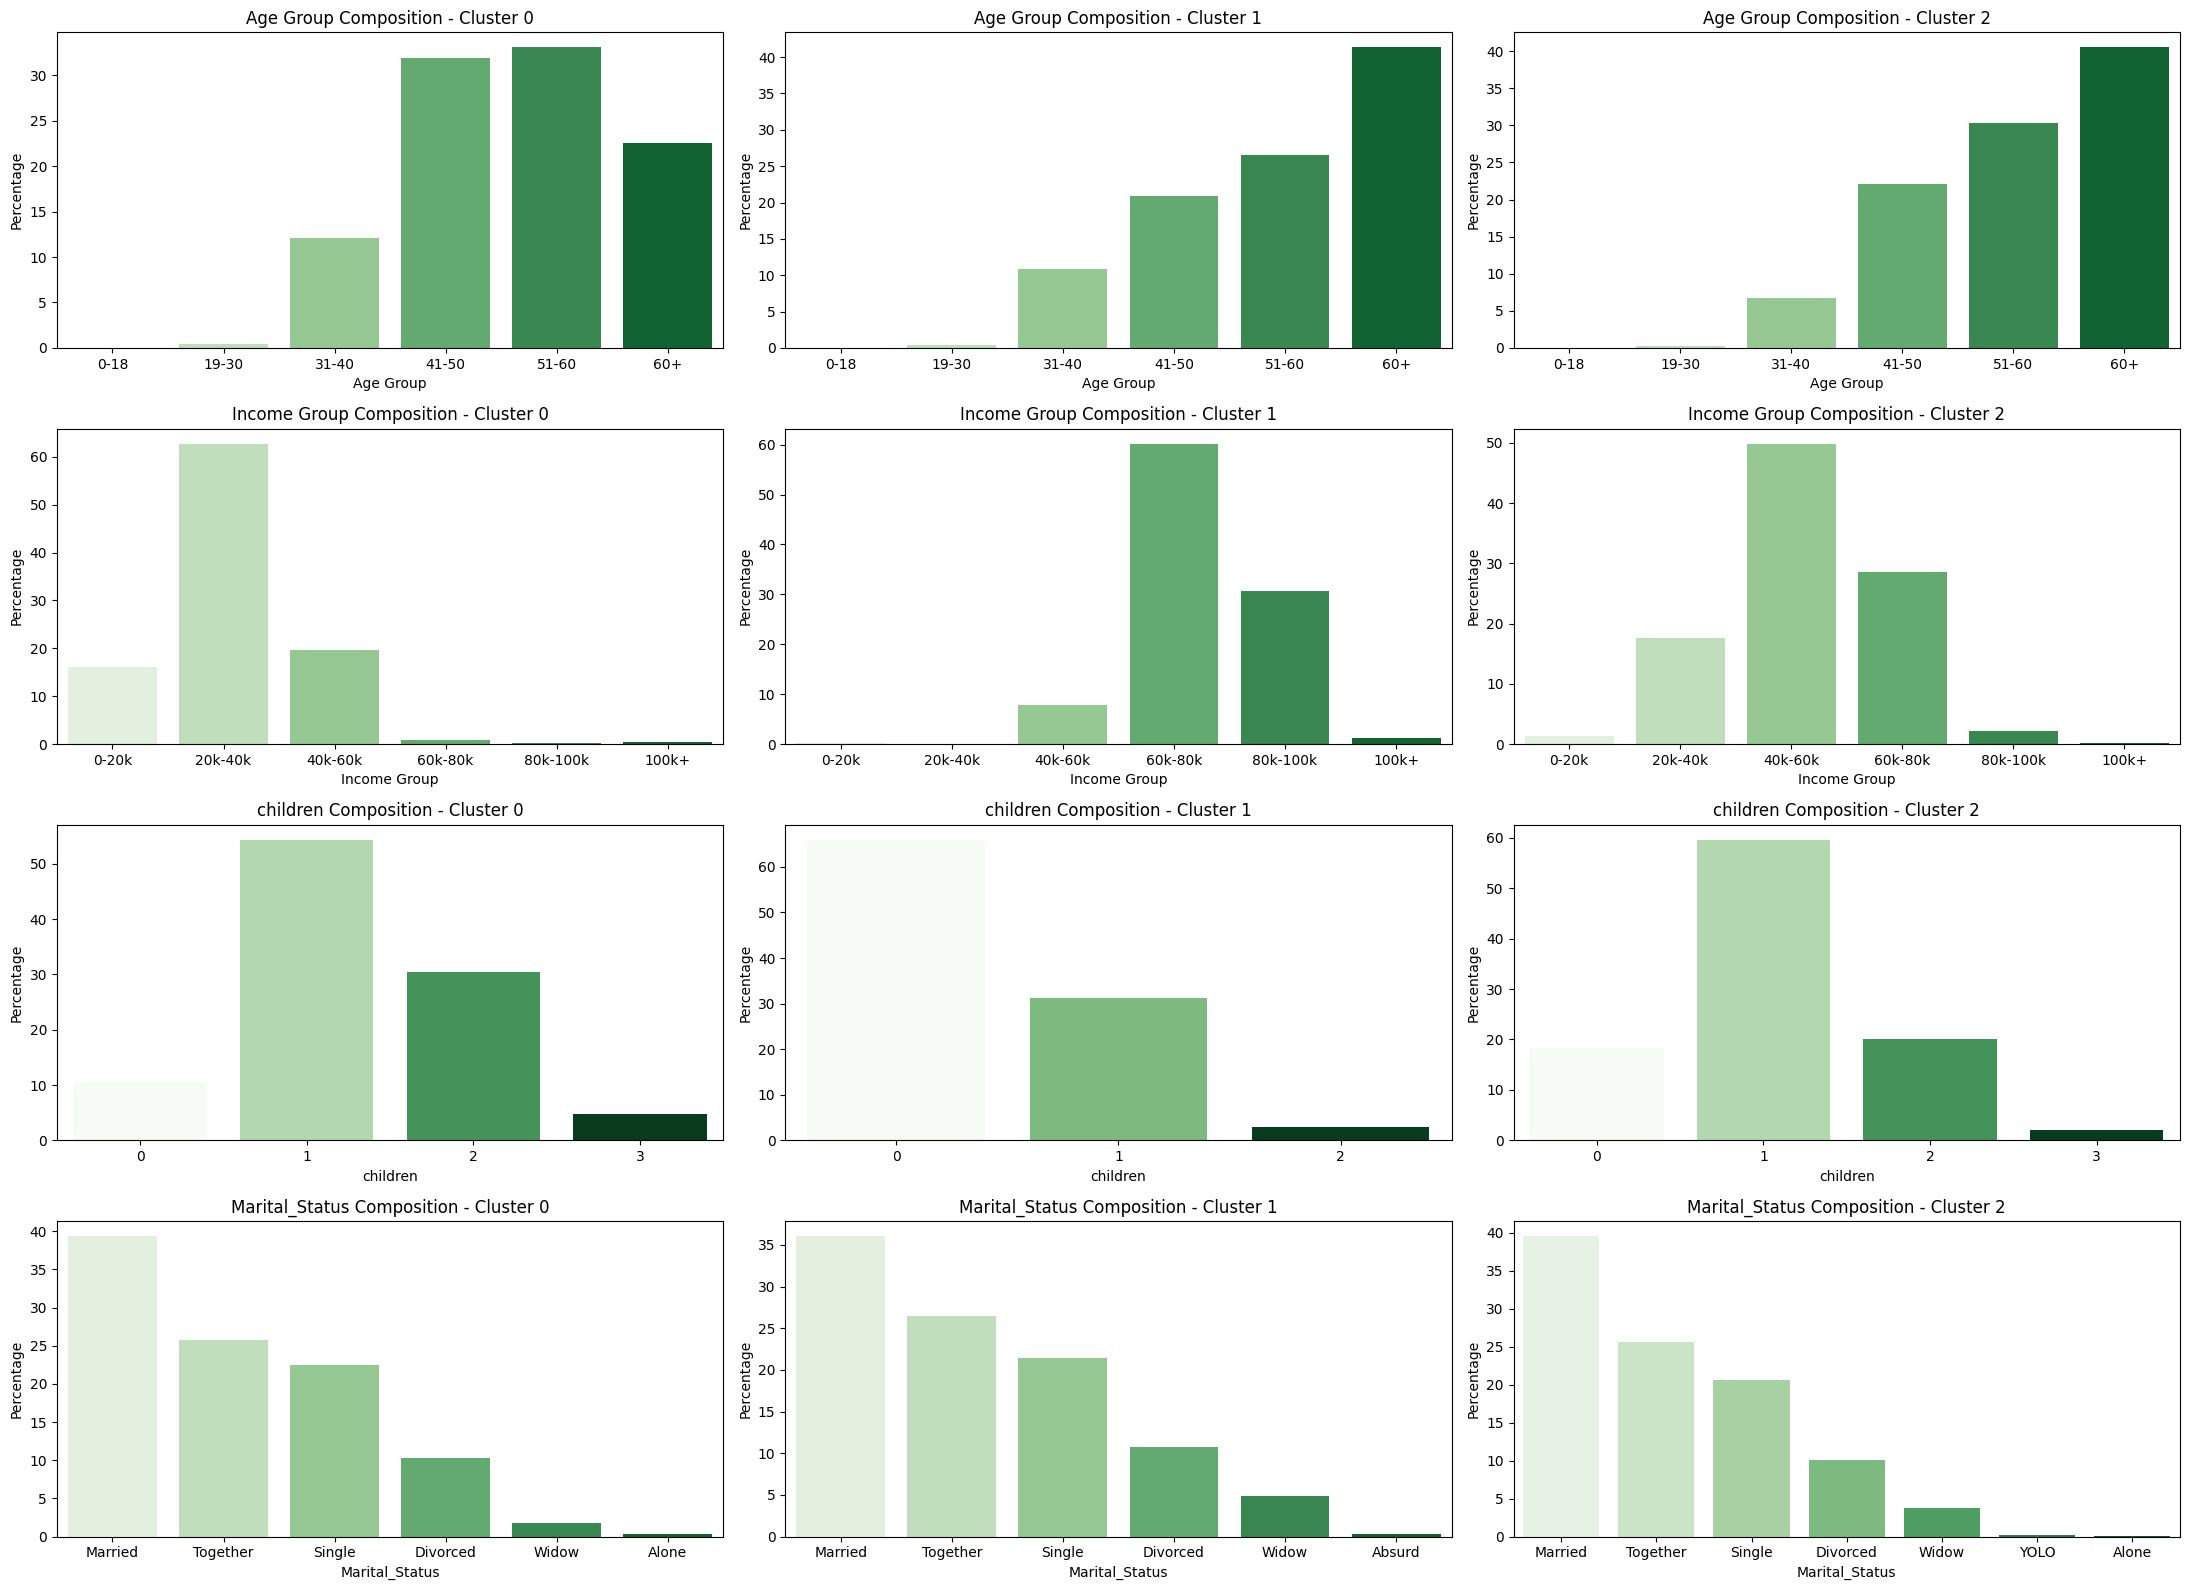

In [43]:
# Define the features for visualization
features = ['Age Group', 'Income Group', 'children', 'Marital_Status']

# Set up the figure
n_clusters = len(dataframe['Cluster'].unique())
fig, axes = plt.subplots(4, n_clusters, figsize=(22, 16))

# Loop through each cluster
for cluster_id in dataframe['Cluster'].unique():
    # Filter the data for the specific cluster
    cluster_data = dataframe[dataframe['Cluster'] == cluster_id]

    # Loop through each feature and create the bar plots for the specific cluster
    for i, feature in enumerate(features):
        # Count the occurrences of each category in the feature for the specific cluster
        feature_counts = cluster_data[feature].value_counts().reset_index()
        feature_counts.columns = [feature, 'Count']
        feature_counts['Percentage'] = (feature_counts['Count'] / feature_counts['Count'].sum()) * 100

        # Create the bar plot for the feature
        sns.barplot(data=feature_counts, x=feature, y='Percentage', ax=axes[i, cluster_id], hue=feature, palette="Greens", legend=False)

        # Set plot titles and labels
        axes[i, cluster_id].set_title(f'{feature} Composition - Cluster {cluster_id}')
        axes[i, cluster_id].set_xlabel(feature)
        axes[i, cluster_id].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

# **Customer profiling Summary**

In [41]:
# Calculate the cluster counts and percentages
cluster_counts = dataframe['Cluster'].value_counts()
cluster_percentages = (cluster_counts / len(dataframe)) * 100

# Create a DataFrame to summarize the cluster distribution
cluster_summary_df = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage': cluster_percentages.values
})

cluster_summary_df_sorted = cluster_summary_df.sort_values(by='Cluster')
cluster_summary_df_sorted['Percentage'] = cluster_summary_df_sorted['Percentage'].round(2)
print(cluster_summary_df_sorted)

   Cluster  Count  Percentage
1        0    716       31.96
2        1    596       26.61
0        2    928       41.43


# **Summary of Findings**

The K-Means clustering analysis has revealed three distinct customer segments:

**Cluster 0** (Mid-Spending Families) - 41.40%

This group consists of families with moderate spending habits. They are best reached with marketing strategies that focus on family-oriented products and offer value-driven deals. Tailoring promotions to address practical family needs would likely resonate with this segment.

**Cluster 1** (Affluent Couples) - 26.64%

These individuals tend to have higher disposable incomes and prioritize quality over price. Targeting them with premium, luxury offerings, exclusive discounts, and sophisticated experiences is most likely to drive engagement and conversion.

**Cluster 2** (Budget-Conscious Families) - 31.96%

Characterized by a focus on saving and cost-effective solutions, this segment responds well to discounts and affordable pricing. Marketing messages that emphasize value, practicality, and deals can effectively attract and retain these customers.

**Conclusion**

By understanding these clusters, businesses can tailor their marketing strategies to appeal to the unique preferences and financial behaviors of each group. For example, Cluster 0 may appreciate bundling offers, Cluster 1 might value personalized experiences or loyalty programs, and Cluster 2 could be drawn to flash sales and limited-time discounts. Segmenting customers in this way enables more efficient resource allocation and maximizes the return on marketing investments.
